# VGGNet Architecture
(Paper: https://arxiv.org/pdf/1409.1556.pdf)

#### Paper Summary
- Small Receptive 3x3 fields (Conv2D) were opted throughout the network.
- A stride of 1 was used.
- Stacking multiple Conv layers before MaxPooling helps the network to be more discriminative.
- Inclusion of 1 x 1 Conv Layers helps to increase non-lineqarity without affecting the receptive fields of the conv layers.
- All layers are activated with relu.
- Max pooling is done with 2 x 2 window at a stride 2. 


In [45]:
import tensorflow as tf 
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, MaxPool2D, Dropout, Input, Flatten
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model

## Building Blocks

#### Conv & Max Pool Layers 

In [46]:
def conv(input,unit, kernel_size):
    x = Conv2D(filters=unit,kernel_size=kernel_size, activation='relu', padding='same')(input)
    return x

def max_pool(input):
    return MaxPool2D(pool_size=2, strides=2, padding='same')(input)

#### Conv1 & 3 Layers

In [47]:
def conv1(input, unit):
    return conv(input, unit, 1)

In [48]:
def conv3(input, unit):
    return conv(input, unit, 3)

#### Different Architectural stages


In [49]:
def stage_1(x, no_of_sublayers):
    for i in range(no_of_sublayers):
        x = conv3(x, 64)
    return x 

def stage_2(x, no_of_sublayers2):
    for i in range(no_of_sublayers2):
        x = conv3(x, 128)
    return x 

def stage_3(x, no_of_sublayers3, conv1_layer = False):
    for i in range(no_of_sublayers3):
        x = conv3(x, 256)
    if conv1_layer:
        x = conv1(x, 256)
    return x

def stage_4(x, no_of_sublayers4, conv1_layer = False):
    for i in range(no_of_sublayers4):
        x = conv3(x, 512)
    if conv1_layer:
        x = conv1(x, 512)
    return x



### Final Architecture

In [50]:
def final_architecture(vgg_type):
    if vgg_type not in [11, 13, 16, 19]:
        raise ValueError('enter one of 11, 13, 16 or 19 as VGGtype')

    if vgg_type>11:
        no_of_sublayers = no_of_sublayers2 = 2
    else:
        no_of_sublayers = no_of_sublayers2 = 1

    if vgg_type>16:
        no_of_sublayers3 = no_of_sublayers4 = 4
    else:
        no_of_sublayers3 = no_of_sublayers4 = 2

    if vgg_type == 16:
        conv1_layer = True
    else:
        conv1_layer = False
    
    input = Input(shape=(224,224, 3))
    x = stage_1(input, no_of_sublayers)
    x = max_pool(x)
    x = stage_2(x, no_of_sublayers2)
    x = max_pool(x)
    x = stage_3(x, no_of_sublayers3, conv1_layer=conv1_layer)
    x = max_pool(x)
    x = stage_4(x, no_of_sublayers4, conv1_layer = conv1_layer)
    x = max_pool(x)
    x = stage_4(x, no_of_sublayers4, conv1_layer = conv1_layer)
    x = max_pool(x)
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(4096, activation='relu')(x)
    output = Dense(1000, activation='softmax')(x)
    model = Model(input, output)

    return model

        

# VGG19

In [51]:
VGG_19 = final_architecture(19)

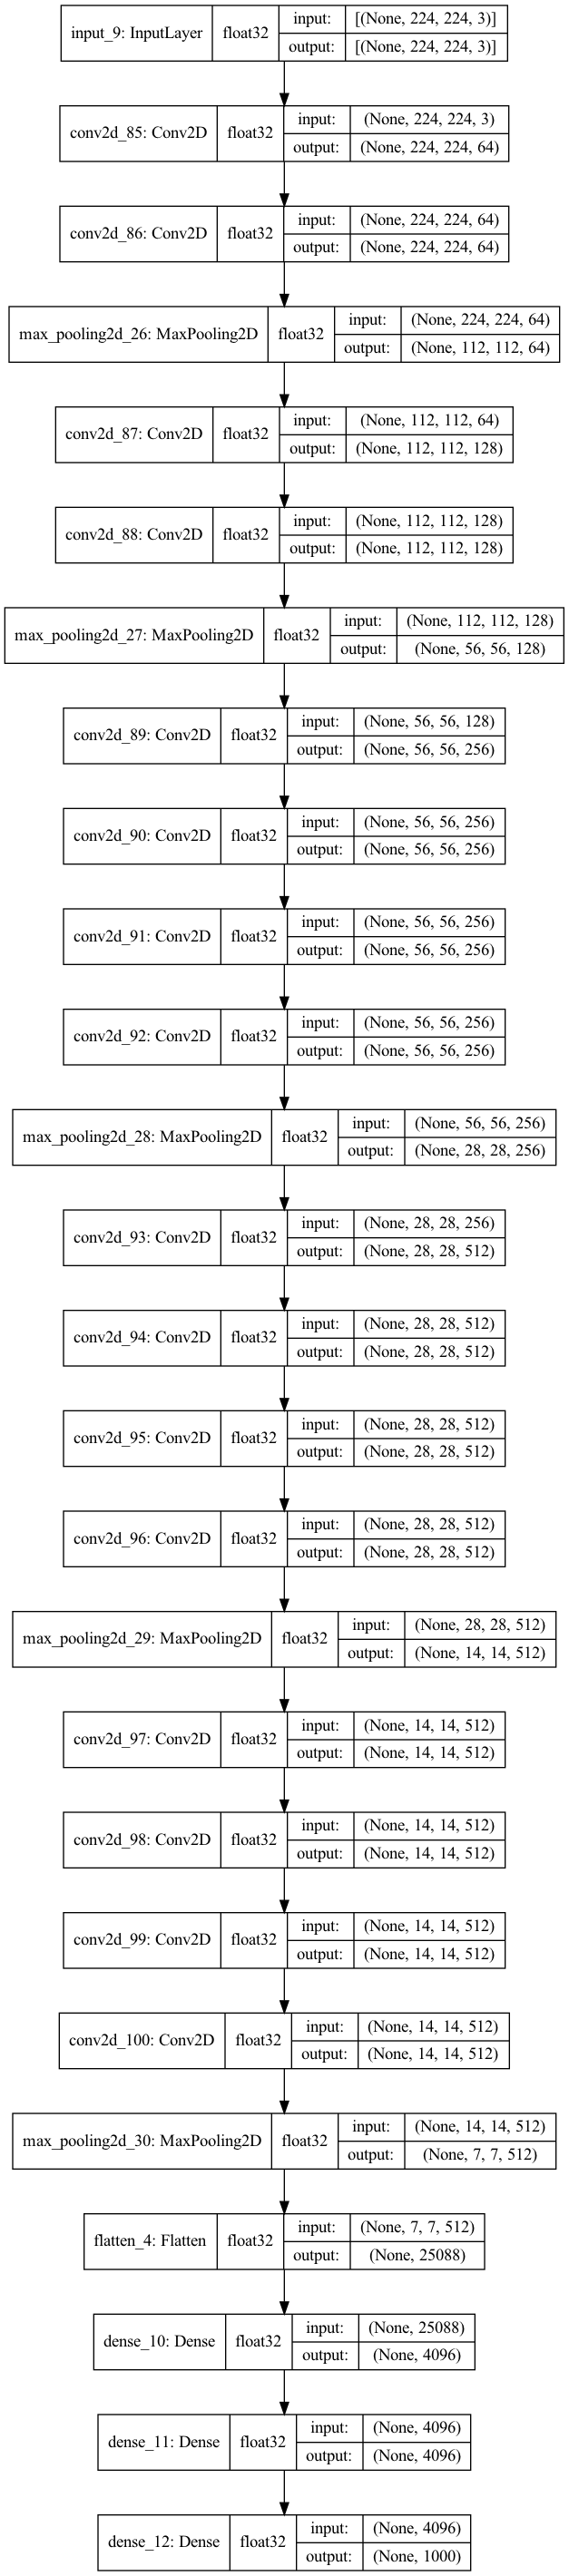

In [52]:
plot_model(VGG_19, 
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    expand_nested=True,
    dpi=96,
    
)

# VGG_16

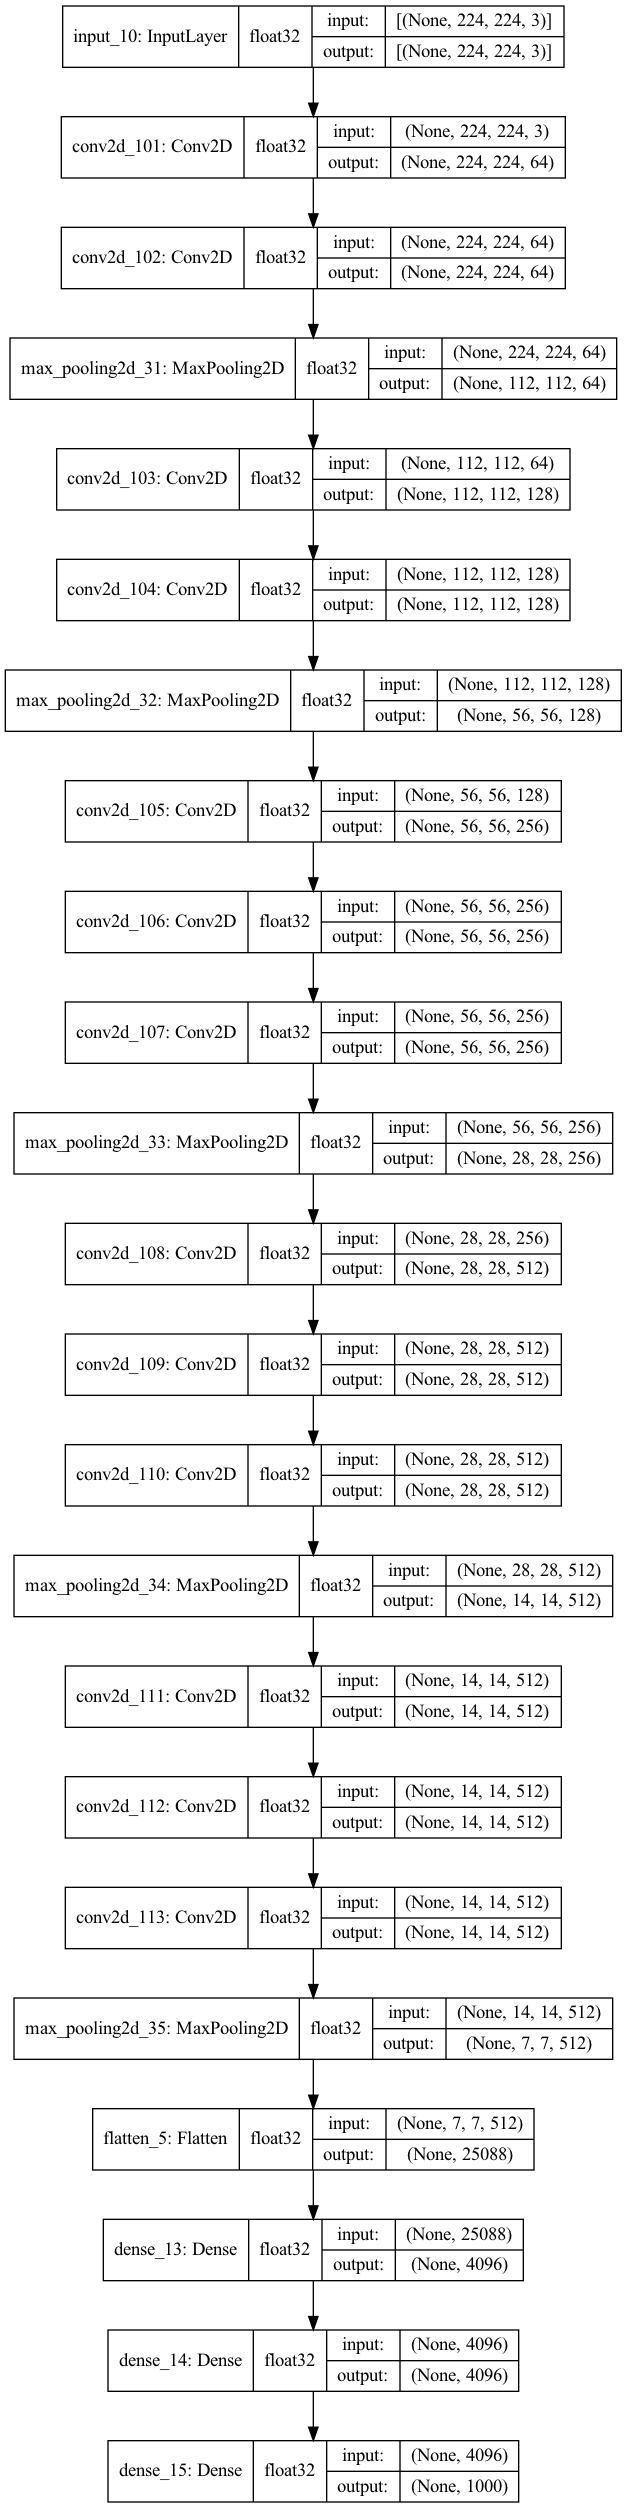

In [55]:
VGG_16 = final_architecture(16)
plot_model(VGG_16, 
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    expand_nested=True,
    dpi=96,
    
)

# VGG 13 

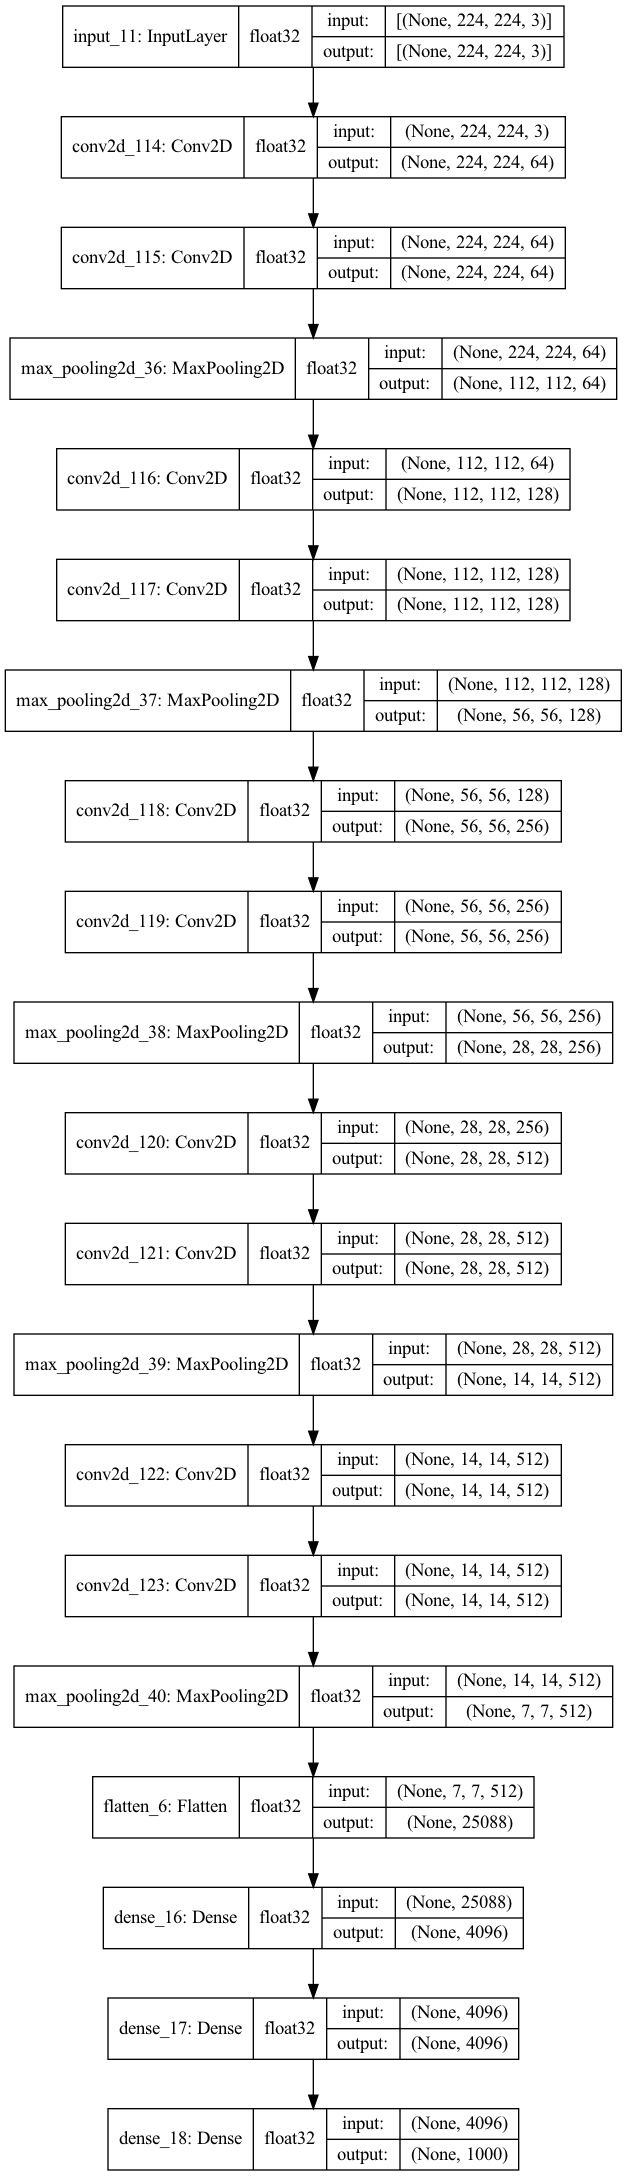

In [56]:
VGG_13 = final_architecture(13)
plot_model(VGG_13, 
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    expand_nested=True,
    dpi=96
    
)

# VGG 11 

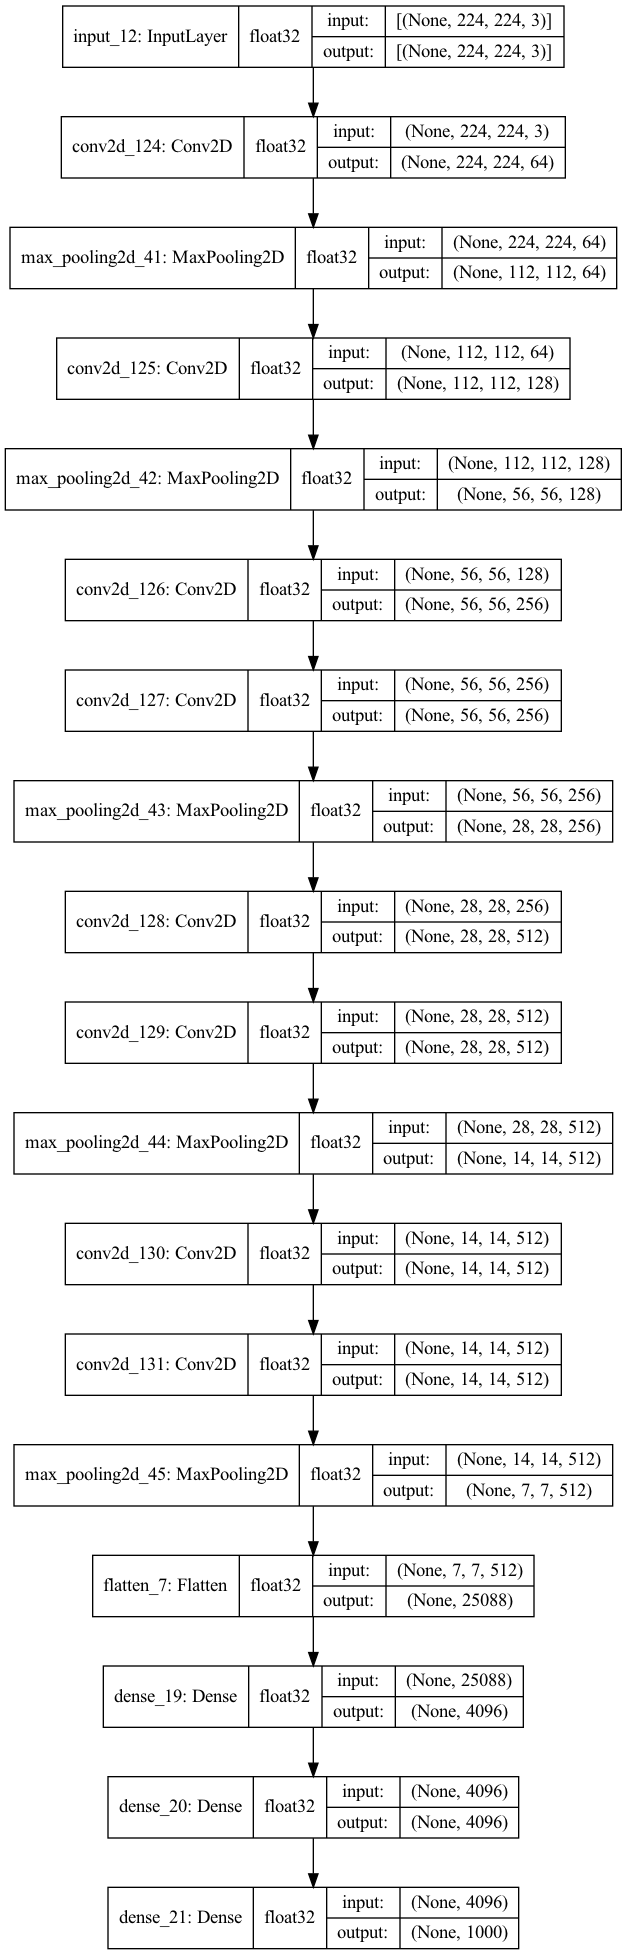

In [57]:
VGG_11 = final_architecture(11)
plot_model(VGG_11, 
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    expand_nested=True,
    dpi=96,
    
)